<a href="https://colab.research.google.com/github/mstfarjanaofficial/Childcare-Serviecs-Analysis/blob/main/Childcare_Serviecs_Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step-01:Import Section

In [9]:
#step-01: Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step-02: Load the data


In [12]:
#step-02: Load the data.

df = pd.read_csv('Childcare Services.csv')
output =[] # List to store output results
output.append("Exploratroy Data Analysis of Childcare\n")
output.append("===========================\n")


## Step-03: Explore the data

In [13]:
print(df.head()) #Display the first few rows
output.append(f"First few rows:\n{df.head()}\n")

         Date            Product Region Customer_Type  Quantity   Price  \
0  2024-12-24            Daycare   East     Guardians        10  948.19   
1  2024-11-25  After School Care   West     Guardians         8  794.70   
2  2024-10-08  After School Care  North       Parents        14  447.30   
3  2024-06-18            Daycare   West       Parents         9  127.60   
4  2024-06-05  After School Care   West     Guardians        12  353.69   

   Discount  Revenue  
0      0.22  7395.88  
1      0.11  5658.26  
2      0.04  6011.71  
3      0.21   907.24  
4      0.25  3183.21  


## Step-04: Clean the data


In [14]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price          1000 non-null   float64
 6   Discount       1000 non-null   float64
 7   Revenue        1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


In [19]:
output.append("Data Cleaning Results:\n")
#Check for missing values
missing_values = df.isnull().sum()
print(missing_values)
output.append(f"Missing Values:\n{missing_values}\n")

# Fill or drop missing values as necessary
df.dropna(inplace=True)
# Convert the Data column to datatime formet
df['Data'] = pd.to_datetime(df['Date'])

Date             0
Product          0
Region           0
Customer_Type    0
Quantity         0
Price            0
Discount         0
Revenue          0
Data             0
dtype: int64


In [23]:
# Check for Doplicates

duplicates =df.duplicated().sum()
output.append(f"Number of Duplicates Dropped:{duplicates}\n")
df.drop_duplicates(inplace=True)

## Step-05: Analyze the data

In [25]:
#Total revenue from cleaning servicres

total_revenue = df['Price'].sum()

output.append(f'Total Revenue: ${total_revenue}\n')
print(f'Total Revenue: ${total_revenue}')

Total Revenue: $549043.75


In [28]:
# Average price for Customer_Type wise
average_price_per_service = df.groupby('Customer_Type')['Price'].mean()
output.append("Average Price per Customer Type:\n")
output.append(f"{average_price_per_service}\n")
print(average_price_per_service)

Customer_Type
Guardians    548.231484
Parents      549.895963
Name: Price, dtype: float64


In [29]:
# Total services provided by region
total_services_by_region = df['Region'].value_counts()
output.append("Total Services Provided by Region:\n")
output.append(f"{total_services_by_region}\n")
print(total_services_by_region)

Region
West     256
East     254
North    253
South    237
Name: count, dtype: int64


In [32]:
# Total revenue by region
revenue_by_region = df.groupby('Region')['Price'].sum()
output.append("Total Revenue by region:\n")
output.append(f"{revenue_by_region}\n")
print(revenue_by_region)

Region
East     139860.08
North    138652.20
South    127760.99
West     142770.48
Name: Price, dtype: float64


## Step-06: Visualize the data

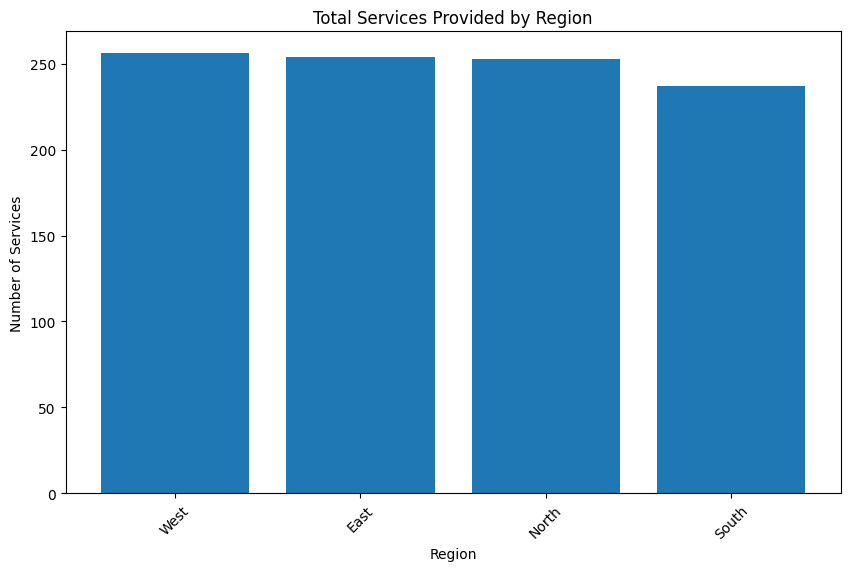

In [35]:
plt.figure(figsize=(10,6))
plt.bar(total_services_by_region.index, total_services_by_region.values)
plt.title('Total Services Provided by Region')
plt.xlabel('Region')
plt.ylabel('Number of Services')
plt.xticks(rotation=45)
plt.savefig('total_services_by_region.png') # save the figure
plt.show()


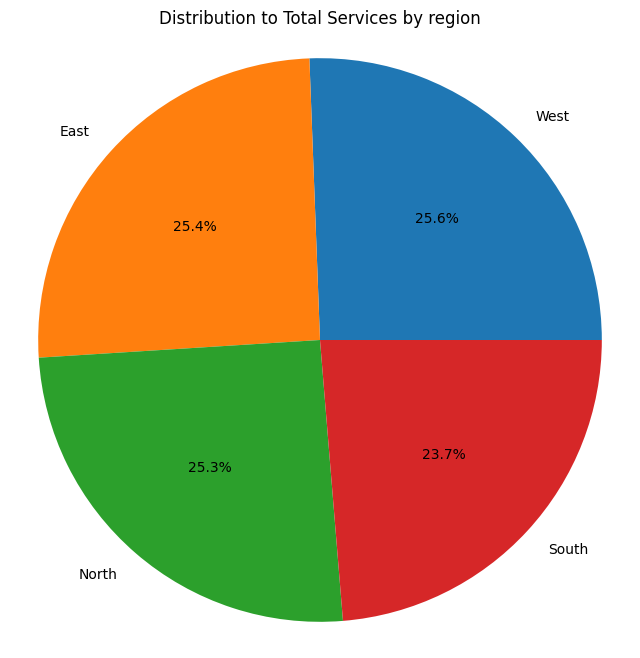

In [36]:
# pie chart for total services by region

plt.figure(figsize=(8,8))
plt.pie(total_services_by_region, labels=total_services_by_region.index, autopct='%1.1f%%')
plt.title('Distribution to Total Services by region')
plt.axis('equal') # Equal aspect ratio ensure that pie chart is circular
plt.savefig('services_distribution_by_region.png') # save the figure
plt.show()

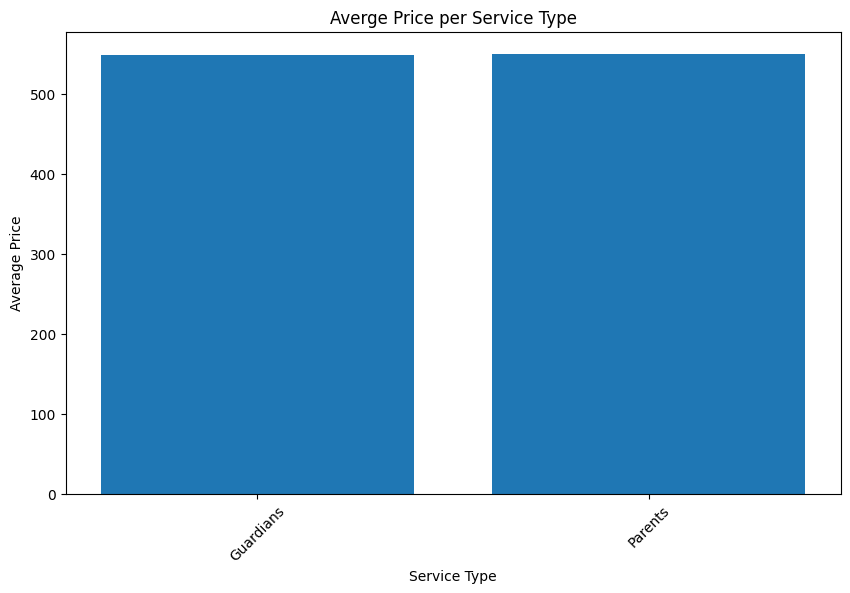

In [38]:
# Bar plot of average price per services type

plt.figure(figsize=(10,6))
plt.bar(average_price_per_service.index, average_price_per_service.values)
plt.title('Averge Price per Service Type')
plt.xlabel('Service Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.savefig('average_price_per_service.png') # Save the figure
plt.show()

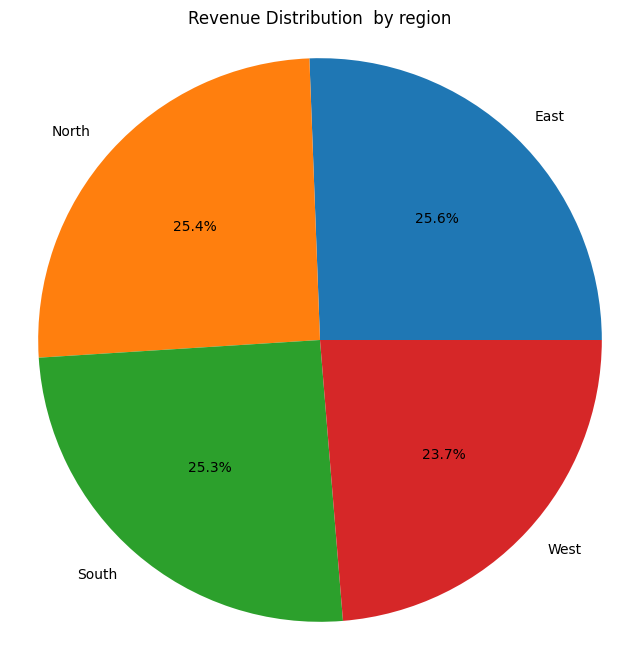

In [39]:
# Pie chart for revenue by service type

plt.figure(figsize=(8,8))
plt.pie(total_services_by_region, labels=revenue_by_region.index, autopct='%1.1f%%')
plt.title('Revenue Distribution  by region')
plt.axis('equal') # Equal aspect ratio ensures that pie chart is circular
plt.savefig('revenue_distribution_by_region.png') # save the figure
plt.show()

## Step-07: save output in file

In [43]:
# Save output to atext file

with open ('analysis_output.txt','w') as f:
  f.writelines (output)